###  Importing Libraries

In [1]:
# Importing some necessary libraries

library(tidyverse)
library(repr)
library(GGally)
library(infer)
library(gridExtra)
library(ggplot2)
library(reshape2)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
# Read the CSV file, already download locally
insurance_data <- read.csv("insurance.csv")

# Display the first few rows of the data frame
head(insurance_data)

# Get the structure of the data frame
str(insurance_data)

# Generate summary statistics
summary(insurance_data)


,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

The selected dataset, which we refer to as the "Healthcare Insurance Dataset," consists of essential attributes, including age, gender, BMI, number of dependents (children), smoking habits (yes or no), geographic region, and medical insurance charges. These attributes enable us to study the relationships between personal characteristics and healthcare expenses.

The dataset can be accessed through the following site: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance 

We will use this dataset to address our research question and conduct data analysis in subsequent project phases. Our research question would focus on investigating what influences these medical health insurance charges and how we can predict them.


This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.



## Data Summary

The dataset "insurance.csv" contains the following columns:

- **Age**: The insured person's age.

- **Sex**: Gender (male or female) of the insured.

- **BMI (Body Mass Index)**: A measure of body fat based on height and weight.

- **Children**: The number of dependents covered.

- **Smoker**: Whether the insured is a smoker (yes or no).

- **Region**: The geographic area of coverage.

- **Charges**: The medical insurance costs incurred by the insured person.




### Summary of all data

- The selected dataset, which we refer to as the "Healthcare Insurance Dataset," consists of essential attributes, including age, gender, BMI, number of dependents (children), smoking habits (yes or no), geographic region, and medical insurance charges. These attributes enable us to study the relationships between personal characteristics and healthcare expenses.

# Question

#### What factors, such as age, gender, BMI, etc., are associated with annual health insurance charges?

- Response Variable: Our selected response variable for this study is health insurance charges.

- Explanatory Variables: The set of explanatory variables under consideration encompasses age, gender, BMI (Body Mass Index), family size (number of dependents), and smoking habits. Age plays a pivotal role, as healthcare costs can vary significantly across different age groups. Gender is included as it has the potential to influence the types of healthcare needs. BMI is considered due to its impact on healthcare expenses. Family size is a variable due to its potential role in the spread of illnesses, and smoking habits are included because of the well-established health risks associated with smoking.

- Approach: To better align with the context of our study, we have redefined our response variable to be health insurance charges instead of the initial consideration of categorical variables like *age* and *BMI*

- Rationale: This refinement in our approach is a more suitable fit for effectively addressing our research question.

- Analysis Approach: Our analysis will adopt a multifaceted approach, concentrating on  *inference*. We will employ appropriate statistical techniques to develop predictive models and extract insights into the relationships between the explanatory variables and health insurance charges

# Cleaning the data 

In [3]:
insurance_data_tidy <- na.omit(insurance_data)
# Rename the "sex" column to "gender"
insurance_data_tidy <- insurance_data_tidy %>% 
  rename(gender = sex)

# Check the first few rows of the modified data frame
head(insurance_data_tidy)

,age,gender,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


#### Visualization 

As we are utilizing these explanatory variables to forecast insurance charges, assessing the correlation among these predictor variables is crucial. This step is essential to avoid a strong linear relationship between the explanatory variables, which can lead to multicollinearity issues in our predictive model.

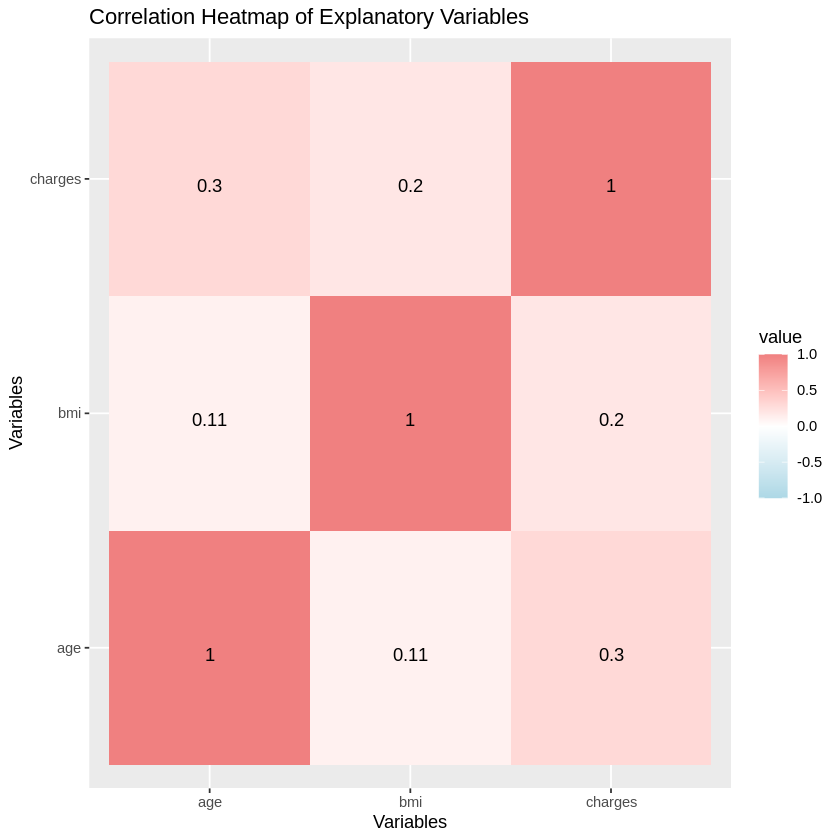

In [4]:
# Compute the correlation matrix for selected variables, excluding "smoker" and "children"
correlation_matrix <- cor(insurance_data_tidy[, c("age", "bmi", "charges")])

# Melt the correlation matrix for plotting
melted_correlation <- melt(correlation_matrix)

# Create a heatmap of the correlation matrix with correlation values and lighter colors
library(ggplot2)
ggplot(data = melted_correlation, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "lightblue", mid = "white", high = "lightcoral", midpoint = 0, limit = c(-1, 1)) +
  geom_text(aes(label = round(value, 2)), vjust = 1) + # Add correlation values
  labs(title = "Correlation Heatmap of Explanatory Variables", x = "Variables", y = "Variables")




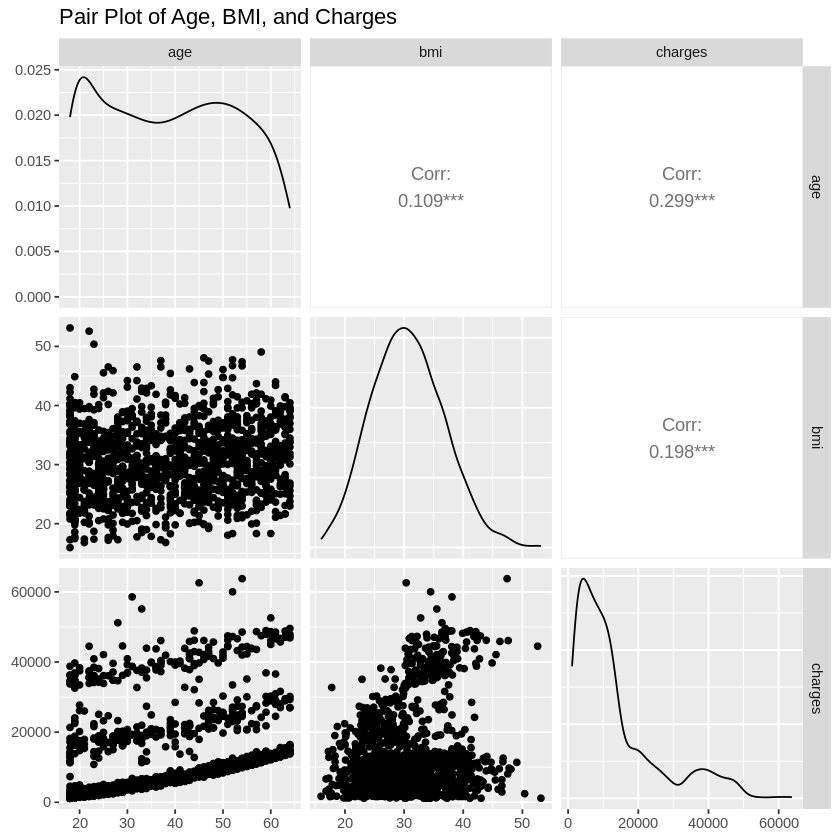

In [5]:
# Create a data frame with the selected variables
data_subset <- insurance_data_tidy[, c("age", "bmi", "charges")]

# Create a pair plot with a title
ggpairs(data_subset, columns = c("age", "bmi", "charges"), title = "Pair Plot of Age, BMI, and Charges")

1. **Analysis of Explanatory Variables and Insurance Charges**

   Our analysis, based on the correlation plot, unveils significant insights regarding the relationships between the explanatory variables and the response variable, "charges."

2. **Low Correlation among Age, BMI**

   - We observe that the correlations between the variables "age" and "bmi" are relatively low. Specifically, "age" and "bmi" display a modest positive correlation, implying a mild association between these factors.

3. **Moderate Correlation of BMI and Age with Charges**

   - In contrast, the correlations between "bmi" and "charges" (0.2) and "age" and "charges" (0.3) exhibit a moderate level of association. This signifies a moderate relationship between these factors and insurance charges.

### Conclusion

Considering these findings, our analysis suggests that potential predictors for modeling insurance charges should include "bmi" and "age." These variables showcase varying degrees of correlation with the response variable and can be considered for predictive modeling, emphasizing their individual and collective impacts on insurance charges. Furthermore, the inclusion of "children," "sex," "smoker," and "region" is worth exploring with other methodologies to assess their potential correlation with charges.


In our analysis, we intend to retain "children," "sex," "smoker," and "region" as potential categorical factors and explore their associations with "charges" using alternative methods.

In [6]:
unique(insurance_data_tidy$children)
unique(insurance_data_tidy$gender)
unique(insurance_data_tidy$smoker)
unique(insurance_data_tidy$region)

[1] 0 1 3 2 5 4

[1] "female" "male"

[1] "yes" "no"

[1] "southwest" "southeast" "northwest" "northeast"

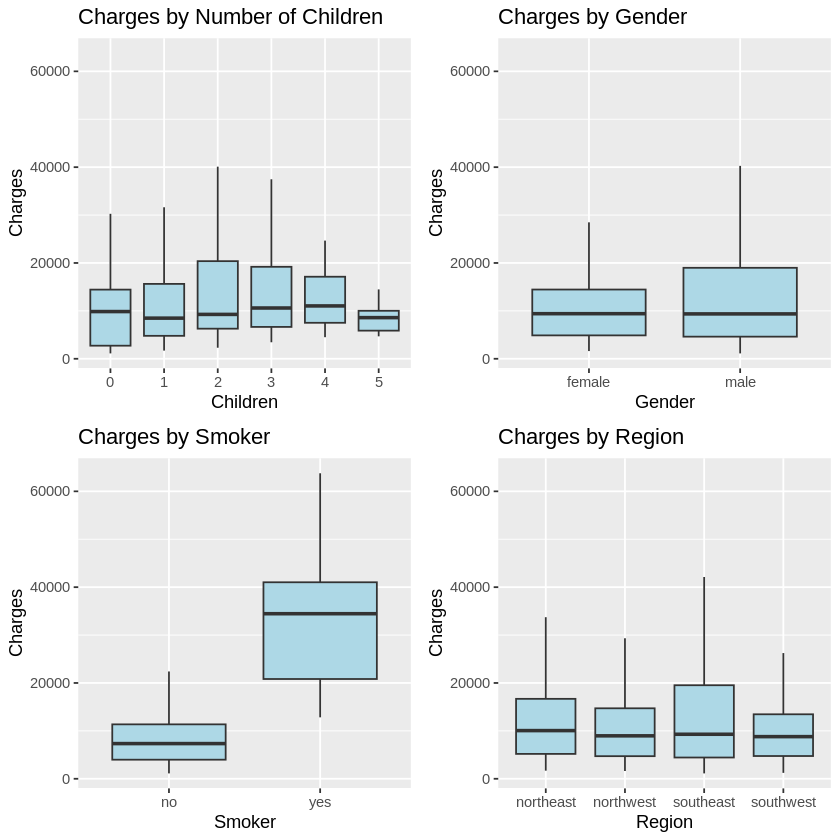

In [7]:
# Create boxplots for charges with respect to each categorical variable (without outliers)
# Boxplot for "children"
children_boxplot <- ggplot(insurance_data_tidy, aes(x = as.factor(children), y = charges)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA) +
  labs(title = "Charges by Number of Children", x = "Children", y = "Charges")

# Boxplot for "sex"
sex_boxplot <- ggplot(insurance_data_tidy, aes(x = gender, y = charges)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA) +
  labs(title = "Charges by Gender", x = "Gender", y = "Charges")

# Boxplot for "smoker"
smoker_boxplot <- ggplot(insurance_data_tidy, aes(x = smoker, y = charges)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA) +
  labs(title = "Charges by Smoker", x = "Smoker", y = "Charges")

# Boxplot for "region"
region_boxplot <- ggplot(insurance_data_tidy, aes(x = region, y = charges)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA) +
  labs(title = "Charges by Region", x = "Region", y = "Charges")

# Arrange the smaller boxplots without outliers in a 2x2 grid
grid.arrange(children_boxplot, sex_boxplot, smoker_boxplot, region_boxplot, ncol = 2)


#### Conclusion

In our analysis based on the boxplots of health insurance charges with respect to various categorical variables, we made several observations:

1. **Number of Children:**
   - The mean charges for different numbers of children are relatively similar.
   - However, there is a notable difference in the upper and lower quantiles, suggesting that the number of children may be a potential factor affecting charges.

2. **Gender (Male vs. Female):**
   - The mean charges for males and females are quite similar.
   - The charges for males appear to have a wider range, although they generally fall within the 0 to 20000 range.
   - Gender, at first glance, may not be a strong predictor of charges.

3. **Smoking Habits (Smoker vs. Non-Smoker):**
   - Smoking habits seem to have a more pronounced effect on charges.
   - Smokers tend to have significantly higher charges compared to non-smokers, suggesting that smoking status could be a strong predictor for charges.

4. **Geographical Region:**
   - The mean charges in different regions are relatively similar.
   - However, the range of the upper and lower quantiles in the Southeast region is larger than in the other regions.
   - This suggests that the Southeast region has a broader distribution of charges, covering the ranges of the other three regions.
   - While region shows some variability, it appears to be less likely to be a strong predictor when compared to children, gender, and smoking status. Further analysis is needed to confirm its impact.

These initial observations from the boxplots provide valuable insights into the potential relationships between the categorical variables and health insurance charges. We will continue our analysis with other methods to further explore and confirm the predictors of charges.


#### 